In [114]:
import matplotlib.pyplot as plt
import pandas as pd

from tools.tools import open_file, DF_TIME, DF_DATA_POINTS, DF_CHANNEL
from hplc.io import load_chromatogram
from hplc.quant import Chromatogram
import numpy as np
from scipy import stats

import os

time = 'time'
signal = 'signal'
base_path = '/home/schwan/syncthing/PD_MN/Experiments/HPLC/20240312/'

files = [
    ('ID',	'Date',	'Key',	'None / Conc (mM)',	'Pos',	'Path'),
    (1, 	202403191200, 	'None',	np.NaN,	61, 	'240319_001_61_LongColumnLacAcetateRiboflavin5.met.asc'),
    (2, 	202403141448, 	'Ch1',	np.NaN,	1, 	'240319_002_1_LongColumnLacAcetateRiboflavin5.met.asc'),
    (3, 	202403141448, 	'Ch2',	np.NaN,	2, 	'240319_003_2_LongColumnLacAcetateRiboflavin5.met.asc'),
    (4, 	202403141448, 	'Ch3',	np.NaN,	3, 	'240319_004_3_LongColumnLacAcetateRiboflavin5.met.asc'),
    (5, 	202403141448, 	'Ch4',	np.NaN,	4, 	'240319_005_4_LongColumnLacAcetateRiboflavin5.met.asc'),
    (6, 	202403141448, 	'Ch5',	np.NaN,	5, 	'240319_006_5_LongColumnLacAcetateRiboflavin5.met.asc'),
    (7, 	202403141448, 	'Ch6',	np.NaN,	6, 	'240319_007_6_LongColumnLacAcetateRiboflavin5.met.asc'),
    (8, 	202403141448, 	'Ch7',	np.NaN,	7, 	'240319_008_7_LongColumnLacAcetateRiboflavin5.met.asc'),
    (9, 	202403141448, 	'Ch8',	np.NaN,	8, 	'240319_009_8_LongColumnLacAcetateRiboflavin5.met.asc'),
    (10, 	202403191200, 	'None',	np.NaN,	62, 	'240319_010_62_LongColumnLacAcetateRiboflavin5.met.asc'),
    (11, 	202403151339, 	'Ch1',	np.NaN,	13, 	'240319_011_13_LongColumnLacAcetateRiboflavin5.met.asc'),
    (12, 	202403151339, 	'Ch2',	np.NaN,	14, 	'240319_012_14_LongColumnLacAcetateRiboflavin5.met.asc'),
    (13, 	202403151339, 	'Ch3',	np.NaN,	15, 	'240319_013_15_LongColumnLacAcetateRiboflavin5.met.asc'),
    (14, 	202403151339, 	'Ch4',	np.NaN,	16, 	'240319_014_16_LongColumnLacAcetateRiboflavin5.met.asc'),
    (15, 	202403151339, 	'Ch5',	np.NaN,	17, 	'240319_015_17_LongColumnLacAcetateRiboflavin5.met.asc'),
    (16, 	202403151339, 	'Ch6',	np.NaN,	18, 	'240319_016_18_LongColumnLacAcetateRiboflavin5.met.asc'),
    (17, 	202403151339, 	'Ch7',	np.NaN,	19, 	'240319_017_19_LongColumnLacAcetateRiboflavin5.met.asc'),
    (18, 	202403151339, 	'Ch8',	np.NaN,	20, 	'240319_018_20_LongColumnLacAcetateRiboflavin5.met.asc'),
    (19, 	202403191200, 	'None',	np.NaN,	62, 	'240319_019_62_LongColumnLacAcetateRiboflavin5.met.asc'),
    (20, 	202403161223, 	'Ch1',	np.NaN,	25, 	'240319_020_25_LongColumnLacAcetateRiboflavin5.met.asc'),
    (21, 	202403161223, 	'Ch2',	np.NaN,	26, 	'240319_021_26_LongColumnLacAcetateRiboflavin5.met.asc'),
    (22, 	202403161223, 	'Ch3',	np.NaN,	27, 	'240319_022_27_LongColumnLacAcetateRiboflavin5.met.asc'),
    (23, 	202403161223, 	'Ch4',	np.NaN,	28, 	'240319_023_28_LongColumnLacAcetateRiboflavin5.met.asc'),
    (24, 	202403161223, 	'Ch5',	np.NaN,	29, 	'240319_024_29_LongColumnLacAcetateRiboflavin5.met.asc'),
    (25, 	202403161223, 	'Ch6',	np.NaN,	30, 	'240319_025_30_LongColumnLacAcetateRiboflavin5.met.asc'),
    (26, 	202403161223, 	'Ch7',	np.NaN,	31, 	'240319_026_31_LongColumnLacAcetateRiboflavin5.met.asc'),
    (27, 	202403161223, 	'Ch8',	np.NaN,	32, 	'240319_027_32_LongColumnLacAcetateRiboflavin5.met.asc'),
    (28, 	202403191200, 	'None',	np.NaN,	63, 	'240319_028_63_LongColumnLacAcetateRiboflavin5.met.asc'),
    (29, 	202403171553, 	'Ch1',	np.NaN,	37, 	'240319_029_37_LongColumnLacAcetateRiboflavin5.met.asc'),
    (30, 	202403171553, 	'Ch2',	np.NaN,	38, 	'240319_030_38_LongColumnLacAcetateRiboflavin5.met.asc'),
    (31, 	202403171553, 	'Ch3',	np.NaN,	39, 	'240319_031_39_LongColumnLacAcetateRiboflavin5.met.asc'),
    (32, 	202403171553, 	'Ch4',	np.NaN,	40, 	'240319_032_40_LongColumnLacAcetateRiboflavin5.met.asc'),
    (33, 	202403171553, 	'Ch5',	np.NaN,	41, 	'240319_033_41_LongColumnLacAcetateRiboflavin5.met.asc'),
    (34, 	202403171553, 	'Ch6',	np.NaN,	42, 	'240319_034_42_LongColumnLacAcetateRiboflavin5.met.asc'),
    (35, 	202403171553, 	'Ch7',	np.NaN,	43, 	'240319_035_43_LongColumnLacAcetateRiboflavin5.met.asc'),
    (36, 	202403171553, 	'Ch8',	np.NaN,	44, 	'240319_036_44_LongColumnLacAcetateRiboflavin5.met.asc'),
    (37, 	202403191200, 	'None',	np.NaN,	64, 	'240319_037_64_LongColumnLacAcetateRiboflavin5.met.asc'),
    (38, 	202403181119, 	'Ch1',	np.NaN,	49, 	'240319_038_49_LongColumnLacAcetateRiboflavin5.met.asc'),
    (39, 	202403181119, 	'Ch2',	np.NaN,	50, 	'240319_039_50_LongColumnLacAcetateRiboflavin5.met.asc'),
    (40, 	202403181119, 	'Ch3',	np.NaN,	51, 	'240319_040_51_LongColumnLacAcetateRiboflavin5.met.asc'),
    (41, 	202403181119, 	'Ch4',	np.NaN,	52, 	'240319_041_52_LongColumnLacAcetateRiboflavin5.met.asc'),
    (42, 	202403181119, 	'Ch5',	np.NaN,	53, 	'240319_042_53_LongColumnLacAcetateRiboflavin5.met.asc'),
    (43, 	202403181119, 	'Ch6',	np.NaN,	54, 	'240319_043_54_LongColumnLacAcetateRiboflavin5.met.asc'),
    (44, 	202403181119, 	'Ch7',	np.NaN,	55, 	'240319_044_55_LongColumnLacAcetateRiboflavin5.met.asc'),
    (45, 	202403181119, 	'Ch8',	np.NaN,	56, 	'240319_045_56_LongColumnLacAcetateRiboflavin5.met.asc'),
    (46, 	202403191200, 	'None',	np.NaN,	65, 	'240319_046_65_LongColumnLacAcetateRiboflavin5.met.asc'),
    (47, 	202403191200, 	'None_Air',	np.NaN,	72, 	'240319_047_72_LongColumnLacAcetateRiboflavin5.met.asc'),
    (48, 	202403191200, 	'Lactate',	.1,	73, 	'240319_048_73_LongColumnLacAcetateRiboflavin5.met.asc'),
    (49, 	202403191200, 	'Lactate',	.25,	74, 	'240319_049_74_LongColumnLacAcetateRiboflavin5.met.asc'),
    (50, 	202403191200, 	'Lactate',	.5,	75, 	'240319_050_75_LongColumnLacAcetateRiboflavin5.met.asc'),
    (51, 	202403191200, 	'Lactate',	1,	76, 	'240319_051_76_LongColumnLacAcetateRiboflavin5.met.asc'),
    (52, 	202403191200, 	'Lactate',	2.5,	77, 	'240319_052_77_LongColumnLacAcetateRiboflavin5.met.asc'),
    (53, 	202403191200, 	'Lactate',	5,	78, 	'240319_053_78_LongColumnLacAcetateRiboflavin5.met.asc'),
    (54, 	202403191200, 	'Lactate',	10,	79, 	'240319_054_79_LongColumnLacAcetateRiboflavin5.met.asc'),
    (55, 	202403191200, 	'Lactate',	20,	80, 	'240319_054_80_LongColumnLacAcetateRiboflavin5.met.asc'),
    (56, 	202403191200, 	'None',	np.NaN,	66, 	'240319_055_66_LongColumnLacAcetateRiboflavin5.met.asc'),
    (57, 	202403191200, 	'None Acetate',	.1,	85, 	'240319_056_85_LongColumnLacAcetateRiboflavin5.met.asc'),
    (58, 	202403191200, 	'Acetate',	.25,	86, 	'240319_057_86_LongColumnLacAcetateRiboflavin5.met.asc'),
    (59, 	202403191200, 	'Acetate',	.5,	87, 	'240319_058_87_LongColumnLacAcetateRiboflavin5.met.asc'),
    (60, 	202403191200, 	'Acetate',	1,	88, 	'240319_059_88_LongColumnLacAcetateRiboflavin5.met.asc'),
    (61, 	202403191200, 	'Acetate',	2.5,	89, 	'240319_060_89_LongColumnLacAcetateRiboflavin5.met.asc'),
    (62, 	202403191200, 	'Acetate',	5,	90, 	'240319_061_90_LongColumnLacAcetateRiboflavin5.met.asc'),
    (63, 	202403191200, 	'Acetate',	10,	91, 	'240319_062_91_LongColumnLacAcetateRiboflavin5.met.asc'),
    (64, 	202403191200, 	'Acetate',	20,	92, 	'240319_063_92_LongColumnLacAcetateRiboflavin5.met.asc'),
    (65, 	202403191200, 	'None',	np.NaN,	65, 	'240319_064_65_LongColumnLacAcetateRiboflavin5.met.asc'),
    (66,	202403191200, 	'None',	np.NaN,	65, 	'240319_065_65_LongColumnLacAcetateRiboflavin5.met.asc'),
]
files = [(a, b, c, d, e, os.path.join(base_path, f)) for (a, b, c, d, e, f) in files]
assert os.path.isfile(files[1][-1]), 'file path issue'

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 133.24it/s]


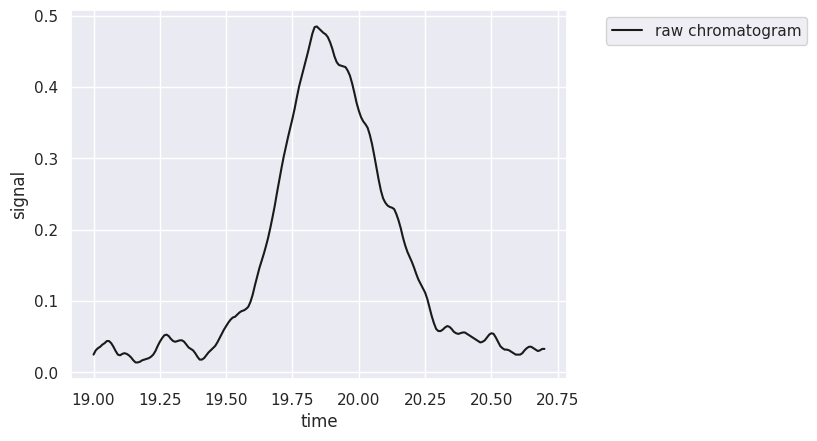

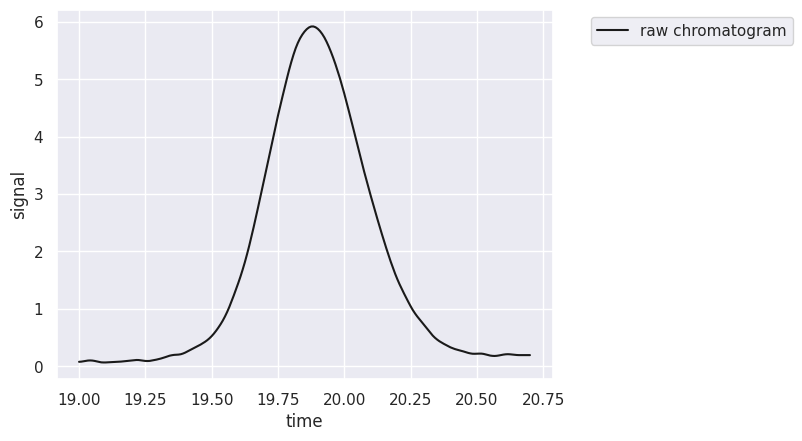

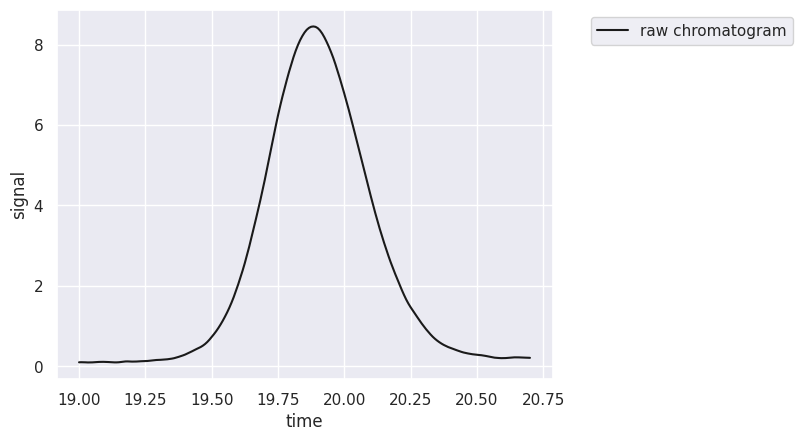

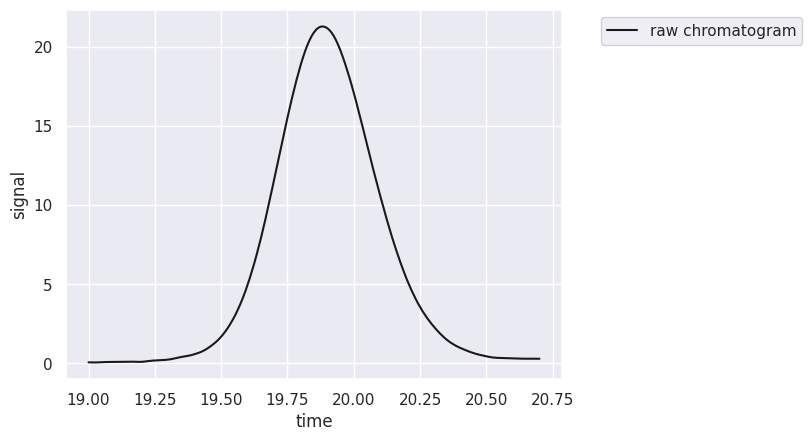

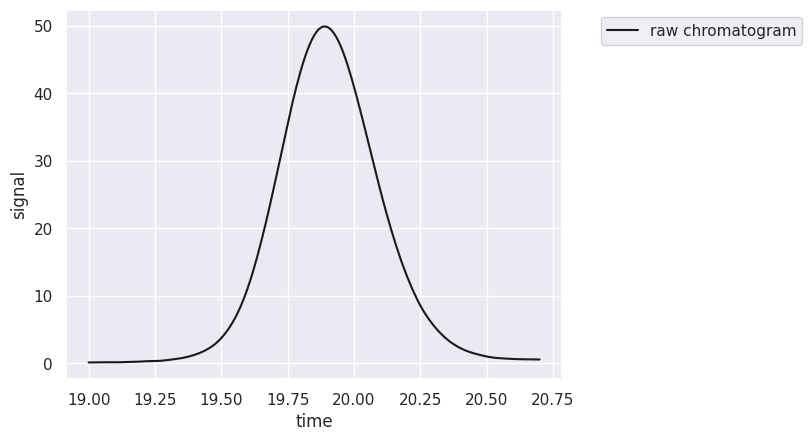

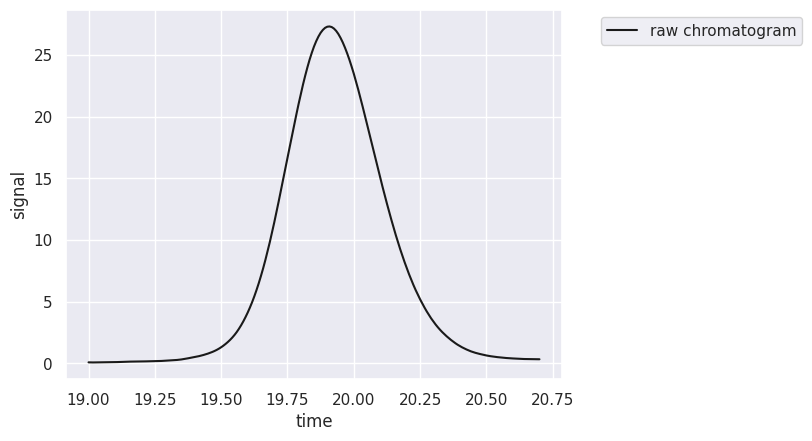

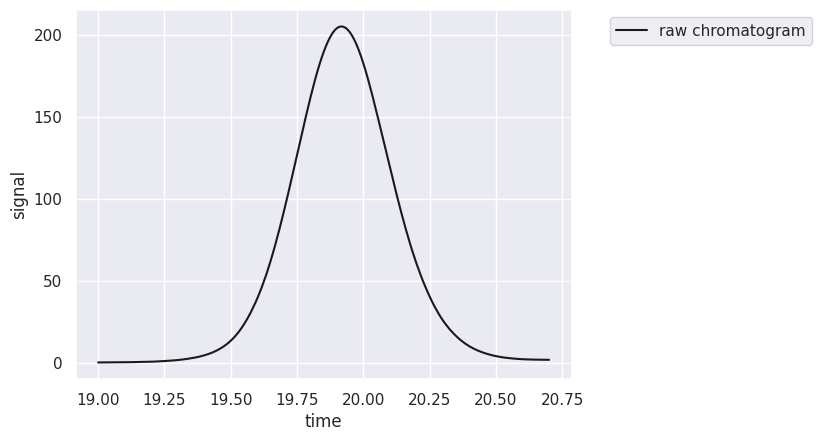

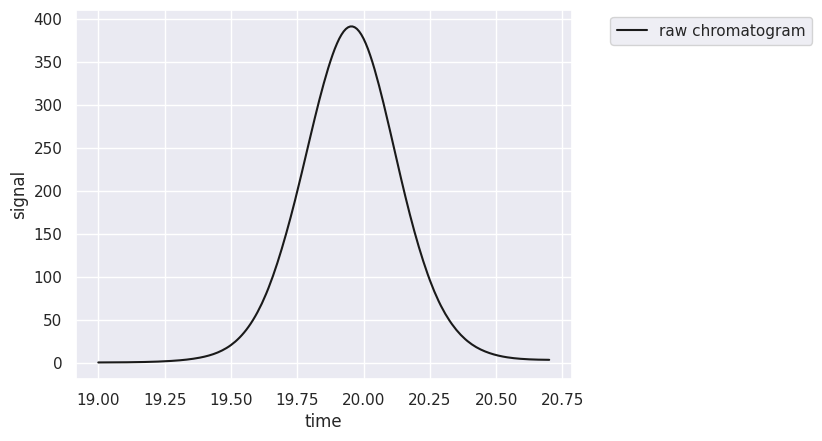

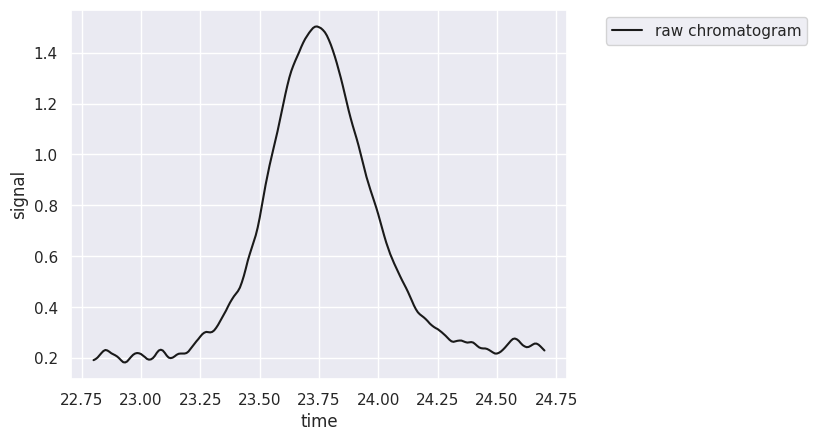

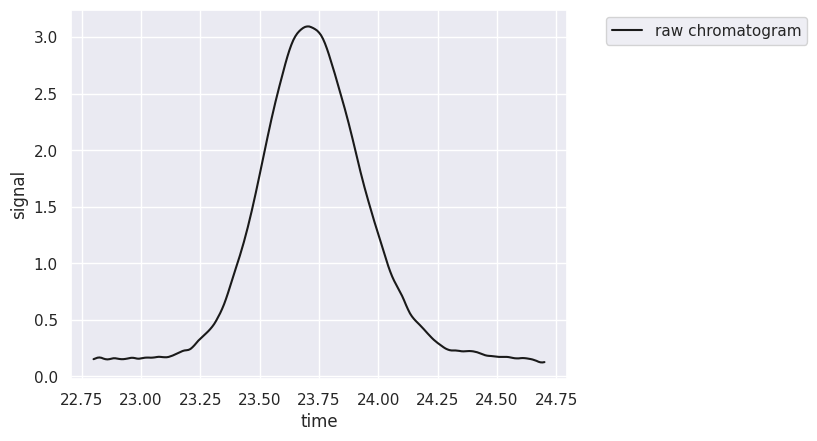

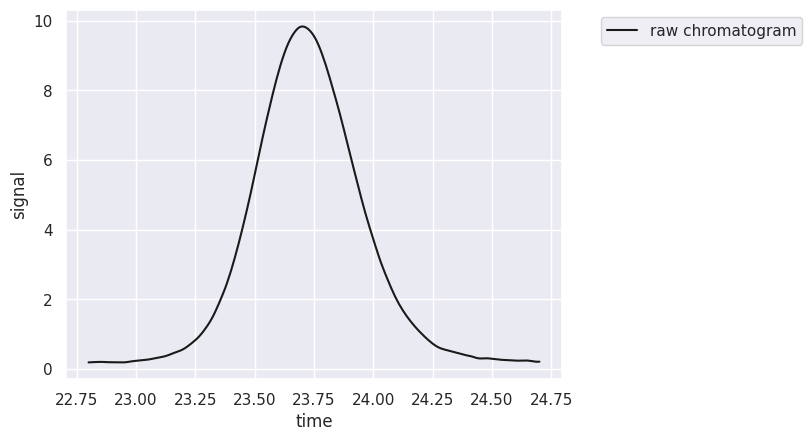

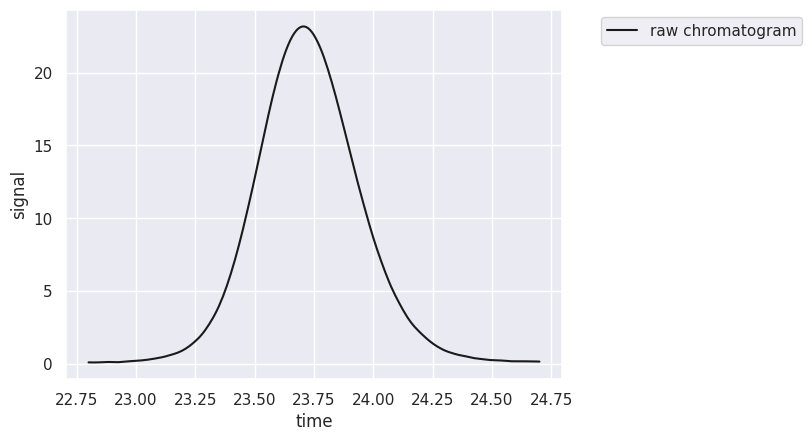

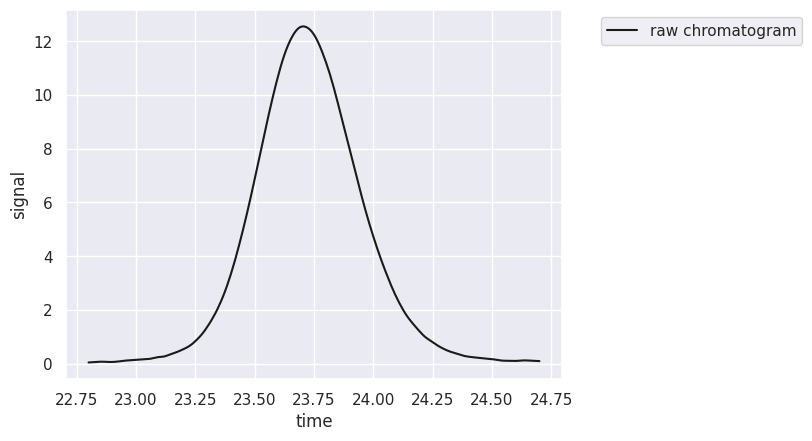

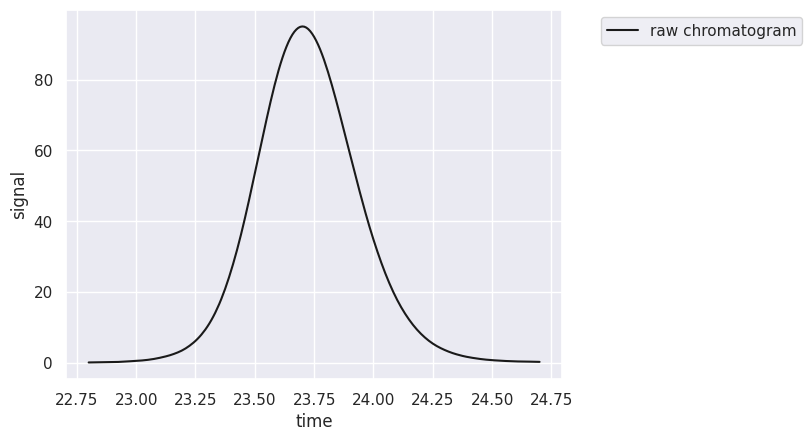

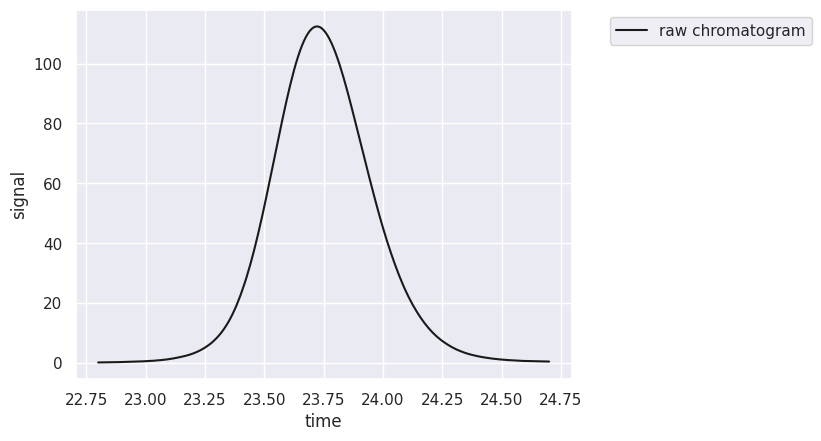

In [115]:
channel = 0
tolerance = .5

all_peaks = None
sample = None

for c_id, date, sample, conc, pos, path in files[48:]:
    if 'None' in sample:
        continue
    # _, pos, sample, conc, path = files[i]
    _, df_all = open_file(path)
    
    df_all[DF_TIME] = df_all[DF_TIME] / 60
    df = df_all.loc[df_all[DF_CHANNEL] == channel, [DF_TIME, DF_DATA_POINTS]].rename(columns={
        DF_TIME: time,
        DF_DATA_POINTS: signal,
    })
    df[signal] = df[signal] + abs(df[signal].min())
    chrom = Chromatogram(df)
    if 'Lactate' in sample:
        chrom.crop([19, 20.7])
    elif 'Acetate' in sample:
        chrom.crop([22.8, 24.7])
    chrom.show()
    peaks = chrom.fit_peaks(
        # buffer=0,
        # prominence=.02, 
        known_peaks=[
            # lactate,
            # succinate,
            # 18.9,
            # acetate,
        ],
        # tolerance=tolerance,
        verbose=True,
    )

    title = f"{pos}: {sample}"
    # print(title)
    if conc is not np.nan:
        title += f" ({conc} mM)"
    # print(peaks.head(100))
    peaks['Name'] = f"{pos}_{sample}"
    peaks['Conc'] = conc
    if all_peaks is None:
        all_peaks = peaks
    else:
        all_peaks = pd.concat([all_peaks, peaks], ignore_index=True)
    # res = title + '\n' + str(peaks.head(100)) + '\n'
    # with open(os.path.join(base_path, '20240311_peak_height_results.txt'), 'a+') as f:
    #     f.write(res)
    # fig = chrom.show()[0]
    # ax = fig.axes[0]
    # for i in [
    #         acetate,
    #         lactate,
    #         succinate,
    #         18.9,
    #     ]:
    #     ax.axvline(i)
    # 
    # fig.suptitle(title)
    # fig.show()
all_peaks.to_csv(os.path.join(base_path, f'standard_curve.csv'))

In [116]:
acetate = np.array([
    # .25,
    # .5,
    # 1,
    # 2.5,
    # 5,
    # 10,
    # 20,
    25, 
    25, 
    25, 
    12.5, 
    12.5, 
    12.5, 
    6.25, 
    6.25, 
    6.25, 
    1.5625, 
    1.5625, 
    1.5625, 
    0.78125, 
    0.78125, 
    0.78125, 
    0.390625, 
    0.390625, 
    0.390625, 
    0.1953125, 
    0.1953125, 
    0.1953125, 
])  # milliMolar
acetate_area = np.array([
    # 305.83264807605,
    # 437.676266082516,
    # 1115.59488504449,
    # 2626.76882173313,
    # 1375.62777232281,
    # 10790.9438479431,
    # 20534.2854403581,
    12143.5544055639, 
    12193.0374417833, 
    12254.2712143599, 
    6116.32093686888, 
    6143.72650362822, 
    6176.38795093067, 
    3074.10080507511, 
    3088.40146723884, 
    3104.90919452018, 
    759.884877348602, 
    763.59579878289, 
    767.664910862918, 
    376.544775486246, 
    379.375849958401, 
    381.600025170925, 
    187.520417075968, 
    187.525799971533, 
    187.790454002086, 
    53.1048850754441, 
    83.2469493381569, 
    88.9666243535112, 
])
acetate_regression = stats.linregress(acetate, acetate_area)
print('Acetate\n', acetate_regression)
print()
line = np.arange(0, acetate.max() + 1, 1)  # acetate.max() + 1
yline = [acetate_regression.intercept + acetate_regression.slope * x for x in line]
fig, ax = plt.subplots()
ax.scatter(acetate, acetate_area, label='Measured Acetate')
ax.plot(line, yline, label=f"{acetate_regression.intercept:.5f} + {acetate_regression.slope:.5f} * x\nR^2: {acetate_regression.rvalue:.5f}")
ax.legend()
fig.savefig(os.path.join(base_path, f"acetate_regression.svg"), )
plt.close()

lactate = np.array([
    # .5,
    # 1,
    # 2.5,
    # 5,
    # 10,
    # 20,
    25, 
    25, 
    25, 
    12.5, 
    12.5, 
    12.5, 
    6.25, 
    6.25, 
    6.25, 
    3.125, 
    3.125, 
    3.125, 
    1.5625, 
    1.5625, 
    1.5625, 
    0.78125, 
    0.78125, 
    0.78125, 
    0.390625, 
    0.390625, 
    0.390625, 
]) # milliMolar
lactate_area = np.array([
    # 179.338111162613,
    # 578.448823107719,
    # 1380.79966212257,
    # 748.649442842786,
    # 5695.41842833221,
    # 6545.81906372499,
    25545.8127513815, 
    25664.0326230384, 
    25812.8715232886, 
    12892.1780673649, 
    12952.50391773, 
    13022.3232139195, 
    6461.96450863091, 
    6494.67026447839, 
    6539.9815697626, 
    3204.71621576364, 
    3224.22278405646, 
    3251.13735594669, 
    1585.75125268769, 
    1595.08164279911, 
    1606.07098074551, 
    791.000385477556, 
    795.31777492526, 
    801.590042526959, 
    397.46223474318, 
    399.038580143967, 
    403.715577404774, 
])
lactate_regression = stats.linregress(lactate, lactate_area)
print('Lactate\n', lactate_regression)
print()
line = np.arange(0, lactate.max() + 1, 1)  # acetate.max() + 1
yline = [lactate_regression.intercept + lactate_regression.slope * x for x in line]
fig, ax = plt.subplots()
ax.scatter(lactate, lactate_area, label='Measured Lactate')
ax.plot(line, yline, label=f"{lactate_regression.intercept:.5f} + {lactate_regression.slope:.5f} * x\nR^2: {lactate_regression.rvalue:.5f}")
ax.legend()
fig.savefig(os.path.join(base_path, f"lactate_regression.svg"))
plt.close()

Acetate
 LinregressResult(slope=488.6807521220283, intercept=3.673185639617259, rvalue=0.9999738562996849, pvalue=3.815749239568887e-42, stderr=0.810691230120762, intercept_stderr=8.793317553168304)

Lactate
 LinregressResult(slope=1028.220477627565, intercept=19.68178547145908, rvalue=0.9999698419066835, pvalue=1.482255093926464e-41, stderr=1.8320453076548768, intercept_stderr=19.988643059758417)


Deconvolving mixture: 100%|██████████| 4/4 [00:00<00:00, 67.79it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Acetate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==


   retention_time     scale       skew  amplitude         area  peak_id  \
0           20.06  0.115210   4.018666   0.980880   117.640953        1   
0           20.72  0.230005   2.665769   0.521210    62.545189        2   
0           22.43  1.408333  14.038635   7.790908   934.839168        3   
0           23.55  0.330305   2.241943  48.169821  5780.378509        4   
0           26.44  0.349567   1.980884  10.025701  1203.074884        5   

  compound  concentration unit  
0      NaN            NaN  NaN  
0      NaN            NaN  NaN  
0      NaN            NaN  NaN  
0  Acetate      11.821021   mM  
0      NaN            NaN  NaN  


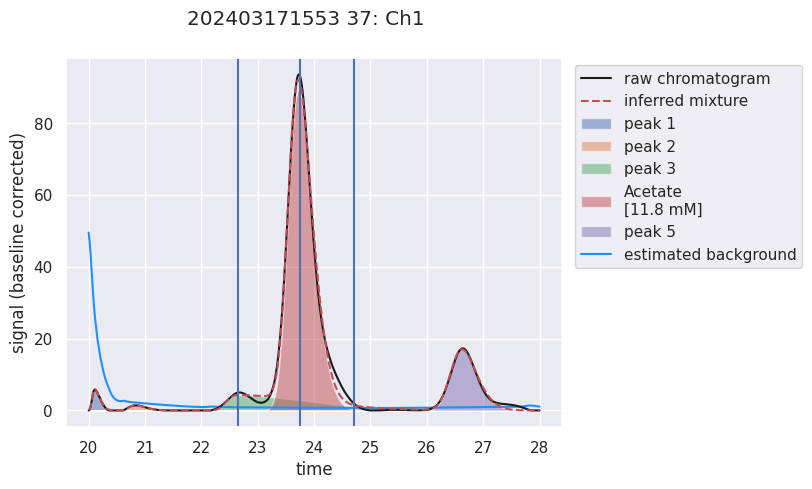

Deconvolving mixture: 100%|██████████| 3/3 [00:00<00:00, 67.34it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Acetate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==


   retention_time     scale       skew  amplitude         area  peak_id  \
0           20.68  0.268910   2.149210   3.459815   415.177850        1   
0           22.37  1.420833  14.921690   8.569486  1028.263517        2   
0           23.53  0.337984   2.369838  51.290182  6154.821822        3   
0           26.41  0.348254   1.990751  10.772663  1292.713466        4   

  compound  concentration unit  
0      NaN            NaN  NaN  
0      NaN            NaN  NaN  
0  Acetate      12.587254   mM  
0      NaN            NaN  NaN  


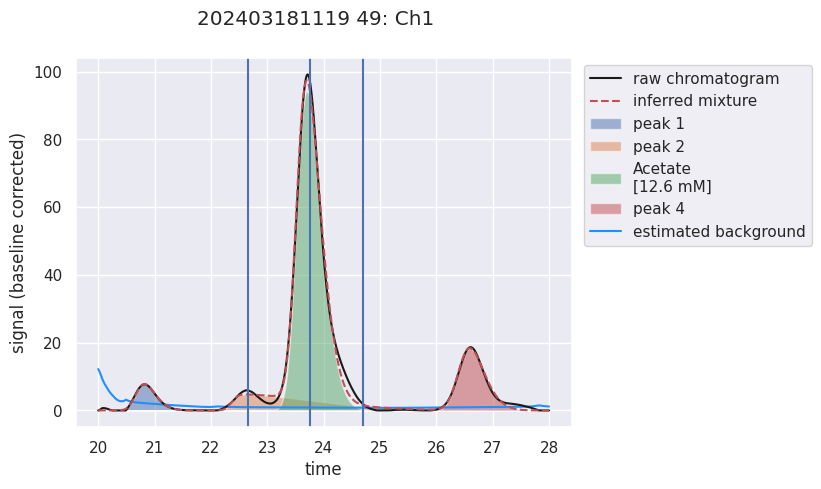

In [182]:
channel = 0
tolerance = .25

lactate = 19.93
acetate = 23.75

known_peaks = [
    # 18.65,
    # lactate,
    # 20.86,
    22.65,
    acetate,
    # 24.3,
    24.7,
]

calibration = {
        # 'Lactate': {
        #     'retention_time': lactate,
        #     'slope': lactate_regression.slope,
        #     'intercept': lactate_regression.intercept,
        #     'unit': 'mM'
        # },
        'Acetate': {
            'retention_time': acetate,
            'slope': acetate_regression.slope,
            'intercept': acetate_regression.intercept,
            'unit': 'mM'
        },
    }
all_peaks = None

#     (66,	202403191200, 	'None',	np.NaN,	65, 	'240319_065_65_LongColumnLacAcetateRiboflavin5.met.asc'),
for id_sample, date_sample, sample, conc, pos, path in files[2:46]:  # 2:46
    if 'None' in sample:
        continue
    if pos not in [
        # 37,
        # 49,
        # 17,
        # 28,
        # 30,
        # 31,
        # 32,
        # # 37,
        # 40,
        # 41,
        # # 49,
        # 53,
        # # 55,
        
    ]:
        continue
    # _, pos, sample, conc, path = files[i]
    _, df_all = open_file(path)
    
    df_all[DF_TIME] = df_all[DF_TIME] / 60
    df = df_all.loc[df_all[DF_CHANNEL] == channel, [DF_TIME, DF_DATA_POINTS]].rename(columns={
        DF_TIME: time,
        DF_DATA_POINTS: signal,
    })
    df[signal] = df[signal] + abs(df[signal].min())
    chrom = Chromatogram(df)
    chrom.crop([20, 28])  # 19.5, 25
    # chrom.show()
    peaks = chrom.fit_peaks(
        # buffer=30,
        # prominence=.05, 
        # known_peaks=known_peaks,
        tolerance=tolerance,
        verbose=True,
    )
    quant_peaks = None
    try:
        quant_peaks = chrom.map_peaks(
            calibration,
            loc_tolerance=tolerance,
            include_unmapped=True,
        )
        print(quant_peaks)
    except ValueError as exc:
        print(f"ERROR {pos}: {sample}: ", exc)
    
    if quant_peaks is None:
        for missing_thing in ['compound',  'concentration', 'unit', ]:
            peaks[missing_thing] = np.nan
        peaks['Issue'] = 'yes'
    else:
        peaks = quant_peaks
        peaks['Issue'] = ''

    title = f"{date_sample} {pos}: {sample}"
    # print(title)
    if conc is not np.nan:
        title += f" ({conc} mM)"

    res = title + '\n' + str(peaks.head(100)) + '\n'
    fig = chrom.show()[0]
    ax = fig.axes[0]
    for i in known_peaks:
        ax.axvline(i)
    peaks['Name'] = f"{pos}_{sample}"
    peaks['Date'] = date_sample
    peaks['Conc'] = conc
    
    if all_peaks is None:
        all_peaks = peaks
    else:
        all_peaks = pd.concat([all_peaks, peaks], ignore_index=True)

    fig.suptitle(title)
    # fig.savefig(os.path.join(base_path, 'curves', f"{id_sample}_failed_{''.join([l for l in title if l.isalnum()])}.svg"), bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# all_peaks.to_csv(os.path.join(base_path, f'failed_results_mod_curve.csv'))



In [183]:
df_molarity = pd.DataFrame.from_records(
    columns=('compound', 'concentration', 'Date', 'Conc', 'Channel'),
    data = [
        ('Acetate', 2.46105875726491, 202403141448, '1', 'Ch1'),
        ('Acetate', 2.96230596897445, 202403151339, '13', 'Ch1'),
        ('Acetate', 5.346259880326, 202403161223, '25', 'Ch1'),
        ('Acetate', 10.157578, 202403171553, '37', 'Ch1'),
        ('Acetate', 10.454924, 202403181119, '49', 'Ch1'),
        ('Acetate', 2.56147121690676, 202403141448, '2', 'Ch2'),
        ('Acetate', 4.72538368928759, 202403151339, '14', 'Ch2'),
        ('Acetate', 5.89165904455627, 202403161223, '26', 'Ch2'),
        ('Acetate', 5.22327027033777, 202403171553, '38', 'Ch2'),
        ('Acetate', 3.47364645878704, 202403141448, '3', 'Ch3'),
        ('Acetate', 4.1023992528684, 202403151339, '15', 'Ch3'),
        ('Acetate', 5.89563110001202, 202403161223, '27', 'Ch3'),
        ('Acetate', 6.50394857303493, 202403171553, '39', 'Ch3'),
        ('Acetate', 0.686876020565884, 202403181119, '51', 'Ch3'),
        ('Acetate', 2.94252326574408, 202403141448, '4', 'Ch4'),
        ('Acetate', 2.82751340577553, 202403151339, '16', 'Ch4'),
        ('Acetate', 2.999843, 202403161223, '28', 'Ch4'),
        ('Acetate', 4.822796, 202403171553, '40', 'Ch4'),
        ('Acetate', 1.38900236663107, 202403181119, '52', 'Ch4'),
        ('Acetate', 4.69863741268932, 202403141448, '5', 'Ch5'),
        ('Acetate', 10.150876, 202403151339, '17', 'Ch5'),
        ('Acetate', 5.65619162575063, 202403161223, '29', 'Ch5'),
        ('Acetate', 0, 202403171553, '41', 'Ch5'),
        ('Acetate', 0, 202403181119, '53', 'Ch5'),
        ('Acetate', 2.88612753812272, 202403141448, '6', 'Ch6'),
        ('Acetate', 5.3238410877392, 202403151339, '18', 'Ch6'),
        ('Acetate', 6.900148, 202403161223, '30', 'Ch6'),
        ('Acetate', 4.62826586474783, 202403171553, '42', 'Ch6'),
        ('Acetate', 3.62910779644381, 202403141448, '7', 'Ch7'),
        ('Acetate', 4.98109598511829, 202403151339, '19', 'Ch7'),
        ('Acetate', 7.296892, 202403161223, '31', 'Ch7'),
        ('Acetate', 4.13552119186255, 202403171553, '43', 'Ch7'),
        ('Acetate', 0, 202403181119, '55', 'Ch7'),
        ('Acetate', 2.94347304685028, 202403141448, '8', 'Ch8'),
        ('Acetate', 4.87140257358814, 202403151339, '20', 'Ch8'),
        ('Acetate', 7.913711, 202403161223, '32', 'Ch8'),
        ('Acetate', 4.72195624325106, 202403171553, '44', 'Ch8'),
        ('Acetate', 0.474138809771062, 202403181119, '56', 'Ch8'),
        ('Lactate', 20.8489711097342, 202403141448, '1', 'Ch1'),
        ('Lactate', 17.2296499489012, 202403151339, '13', 'Ch1'),
        ('Lactate', 14.4122566888192, 202403161223, '25', 'Ch1'),
        ('Lactate', 3.412886, 202403171553, '37', 'Ch1'),
        ('Lactate', 0.871326, 202403181119, '49', 'Ch1'),
        ('Lactate', 12.5816477753073, 202403141448, '2', 'Ch2'),
        ('Lactate', 15.1566469116947, 202403151339, '14', 'Ch2'),
        ('Lactate', 11.8911785296631, 202403161223, '26', 'Ch2'),
        ('Lactate', 0.736719992576518, 202403171553, '38', 'Ch2'),
        ('Lactate', 0.884583622778165, 202403181119, '50', 'Ch2'),
        ('Lactate', 20.1493869343145, 202403141448, '3', 'Ch3'),
        ('Lactate', 17.2508117763378, 202403151339, '15', 'Ch3'),
        ('Lactate', 10.7266731277333, 202403161223, '27', 'Ch3'),
        ('Lactate', 0.95348745509693, 202403171553, '39', 'Ch3'),
        ('Lactate', 3.68105017392793, 202403181119, '51', 'Ch3'),
        ('Lactate', 19.9145346377777, 202403141448, '4', 'Ch4'),
        ('Lactate', 19.5083747059133, 202403151339, '16', 'Ch4'),
        ('Lactate', 13.845907, 202403161223, '28', 'Ch4'),
        ('Lactate', 8.713207, 202403171553, '40', 'Ch4'),
        ('Lactate', 0.678593943062601, 202403181119, '52', 'Ch4'),
        ('Lactate', 16.2743104043171, 202403141448, '5', 'Ch5'),
        ('Lactate', 11.138468, 202403151339, '17', 'Ch5'),
        ('Lactate', 1.21501310168144, 202403161223, '29', 'Ch5'),
        ('Lactate', 0, 202403171553, '41', 'Ch5'),
        ('Lactate', 1.563796, 202403181119, '53', 'Ch5'),
        ('Lactate', 18.9930760644734, 202403141448, '6', 'Ch6'),
        ('Lactate', 16.5505482107558, 202403151339, '18', 'Ch6'),
        ('Lactate', 7.129558, 202403161223, '30', 'Ch6'),
        ('Lactate', 0.715740760452668, 202403171553, '42', 'Ch6'),
        ('Lactate', 1.05190274754232, 202403181119, '54', 'Ch6'),
        ('Lactate', 17.2061772801065, 202403141448, '7', 'Ch7'),
        ('Lactate', 15.3084016298857, 202403151339, '19', 'Ch7'),
        ('Lactate', 6.64733, 202403161223, '31', 'Ch7'),
        ('Lactate', 0.766471930553266, 202403171553, '43', 'Ch7'),
        ('Lactate', 2.180531, 202403181119, '55', 'Ch7'),
        ('Lactate', 18.8035827478335, 202403141448, '8', 'Ch8'),
        ('Lactate', 17.8365165512651, 202403151339, '20', 'Ch8'),
        ('Lactate', 8.602574, 202403161223, '32', 'Ch8'),
        ('Lactate', 0.399969459083217, 202403171553, '44', 'Ch8'),
        ('Lactate', 0.734033652043568, 202403181119, '56', 'Ch8'),
    ],
)
df_molarity['Date'] = pd.to_datetime(df_molarity['Date'], format='%Y%m%d%H%M')
print(df_molarity.head())

  compound  concentration                Date Conc Channel
0  Acetate       2.461059 2024-03-14 14:48:00    1     Ch1
1  Acetate       2.962306 2024-03-15 13:39:00   13     Ch1
2  Acetate       5.346260 2024-03-16 12:23:00   25     Ch1
3  Acetate      10.157578 2024-03-17 15:53:00   37     Ch1
4  Acetate      10.454924 2024-03-18 11:19:00   49     Ch1
